In [1]:
pip install numpy pandas tensorflow scikit-learn matplotlib seaborn biopython


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: C:\Users\Bhava\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [2]:
import os
import pandas as pd
from Bio import SeqIO
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc


In [3]:
from Bio import SeqIO
import os
import pandas as pd

# Set folder path
folder_path = r"C:\DLVE"  # Update with the correct folder path

# Label mapping for DENV serotypes
label_map = {
    "DENV1": 0,
    "DENV2": 1,
    "DENV3": 2,
    "DENV4": 3,
}

# Data list to hold sequences and their labels
data = []

# Loop through each file in the folder
for file in os.listdir(folder_path):
    if file.endswith(".fasta") or file.endswith(".fa"):
        # Determine the label based on the file name
        for serotype in label_map:
            if serotype in file.upper():
                label = label_map[serotype]
                break
        else:
            continue  # Skip files that don't match any label
        
        filepath = os.path.join(folder_path, file)
        
        # Parse the sequences in the fasta file
        for record in SeqIO.parse(filepath, "fasta"):
            sequence = str(record.seq).upper()  # Convert sequence to uppercase
            data.append([sequence, label])

# Convert the data into a DataFrame
df = pd.DataFrame(data, columns=["sequence", "label"])

# Print the first few rows and total samples
print("Sample data:")
print(df.head())
print(f"Total samples: {len(df)}")


Sample data:
                                            sequence  label
0  ATGAACAACCAACGGAAAAAGACGGGTCGACCGTCTTTCAATATGC...      0
1  ATGAACAACCAACGAAAAAAGACGGGTCGACCGTCTTTCAATATGC...      0
2  ATGAACAACCAACGGAAAAAGACGGGTCGACCGTCTTTCAATATGC...      0
3  ATGAACAACCAACGGAAAAAGACGGGTCGACCGTCTTTCAATATGC...      0
4  ATGAACAACCAACGGAAAAAGACGGGTCGACCGTCTTTCAATATGC...      0
Total samples: 5992


In [4]:
print(df.head(100))

                                             sequence  label
0   ATGAACAACCAACGGAAAAAGACGGGTCGACCGTCTTTCAATATGC...      0
1   ATGAACAACCAACGAAAAAAGACGGGTCGACCGTCTTTCAATATGC...      0
2   ATGAACAACCAACGGAAAAAGACGGGTCGACCGTCTTTCAATATGC...      0
3   ATGAACAACCAACGGAAAAAGACGGGTCGACCGTCTTTCAATATGC...      0
4   ATGAACAACCAACGGAAAAAGACGGGTCGACCGTCTTTCAATATGC...      0
..                                                ...    ...
95  ATGAACAACCAACGAAAAAAGACGGCTCGACCGTCTTTCAATATGC...      0
96  ATGAACAACCAACGGAAAAAGACGGCTCGACCGTCTTTCAATATGC...      0
97  ATGAACAACCAACGGAAGAAGACGGGTCGACCGTCTTTCAATATGC...      0
98  ATGAACAACCAACGAAAAAAGACGGCTCGGCCGTCTTTCAATATGC...      0
99  ATGAACAACCAACGGAAGAAGACGGGTCGACCGTCTTTCAATATGC...      0

[100 rows x 2 columns]


In [5]:
print("Label distribution:", df['label'].value_counts())



Label distribution: label
0    2416
1    1955
2    1202
3     419
Name: count, dtype: int64


In [6]:
def one_hot_encode(sequence, max_len=None):
    # Replace unknown nucleotides with '-' (or you can use 'N')
    sequence = ''.join([nuc if nuc in one_hot_dict else '-' for nuc in sequence])

    # Pad the sequence if shorter than max_len
    if max_len:
        sequence = sequence.ljust(max_len, '-')

    return np.array([one_hot_dict[nuc] for nuc in sequence])


In [7]:
print(df['label'].value_counts())


label
0    2416
1    1955
2    1202
3     419
Name: count, dtype: int64


In [8]:
pip install tensorflow



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: C:\Users\Bhava\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd

# Assuming 'df' is already created and has the columns 'sequence' and 'label'

# Set parameters
max_len = 100  # Set the maximum length of the sequence
vocab_size = 10000  # Vocabulary size (you can adjust this)
embedding_dim = 64  # Dimension of embedding vector

# Tokenize the sequences
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(df['sequence'].astype(str))  # Ensure sequences are strings

# Convert sequences to numerical representations
X = tokenizer.texts_to_sequences(df['sequence'])

# Pad sequences to ensure uniform length
X_pad = pad_sequences(X, maxlen=max_len)

# Labels
y = df['label'].values

# Check if data is processed correctly
print(X_pad.shape)  # Should be (number_of_samples, max_len)
print(y.shape)      # Should be (number_of_samples,)


(5992, 100)
(5992,)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Example values – update these according to your dataset
vocab_size = 5000        # Total number of unique tokens in your sequences
embedding_dim = 128      # Dimension of the embedding vectors
num_classes = 4          # Number of DENV classes (e.g., DENV1 to DENV4)
max_len = 100            # Length of padded sequences

# Define the model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    LSTM(64),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Build the model to display summary correctly
model.build(input_shape=(None, max_len))  # None for batch size
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 128)            │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,828 (2.65 MB)

 Trainable params: 693,828 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
from sklearn.model_selection import train_test_split
import numpy as np

# Convert DNA sequence to numeric encoding
def encode_sequence(seq):
    mapping = {'A': 1, 'C': 2, 'G': 3, 'T': 4}
    return [mapping.get(base, 0) for base in seq]

# Apply encoding
df['encoded'] = df['sequence'].apply(encode_sequence)

# Pad sequences to uniform length
from tensorflow.keras.preprocessing.sequence import pad_sequences
MAX_LEN = 1000  # or any value suitable to your average sequence length
X = pad_sequences(df['encoded'], maxlen=MAX_LEN, padding='post')

# Labels
y = df['label'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
 #Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Now train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=64
)


Epoch 1/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.5387 - loss: 1.0751 - val_accuracy: 0.8895 - val_loss: 0.2810
Epoch 2/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.9322 - loss: 0.2002 - val_accuracy: 0.9864 - val_loss: 0.0427
Epoch 3/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.9885 - loss: 0.0340 - val_accuracy: 0.9885 - val_loss: 0.0259
Epoch 4/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.9919 - loss: 0.0171 - val_accuracy: 0.9896 - val_loss: 0.0216
Epoch 5/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.9907 - loss: 0.0182 - val_accuracy: 0.9896 - val_loss: 0.0212


In [13]:
from sklearn.metrics import classification_report

# Predict class probabilities on test data
y_pred_probs = model.predict(X_test)

# Convert to class labels
y_pred = y_pred_probs.argmax(axis=1)

# Classification metrics
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))


38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 299ms/step
Classification Report:
              precision    recall  f1-score   support

           0     0.9865    0.9980    0.9922       511
           1     0.9972    0.9890    0.9931       365
           2     1.0000    0.9834    0.9916       241
           3     0.9880    1.0000    0.9939        82

    accuracy                         0.9925      1199
   macro avg     0.9929    0.9926    0.9927      1199
weighted avg     0.9926    0.9925    0.9925      1199



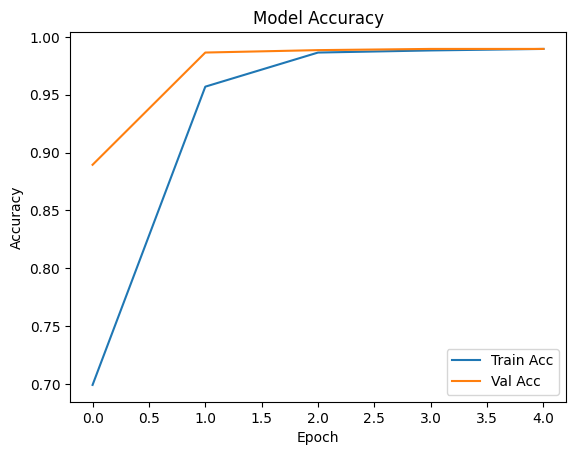

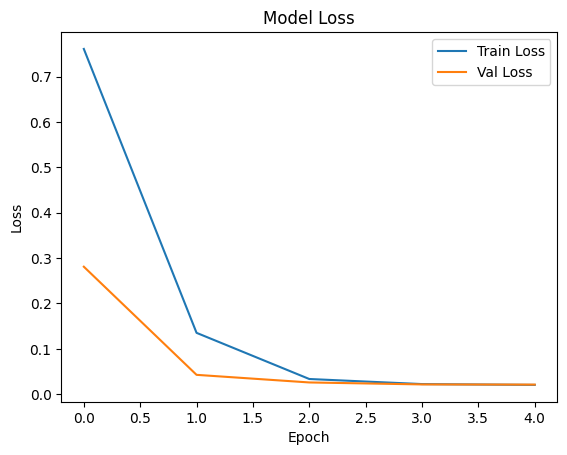

In [14]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


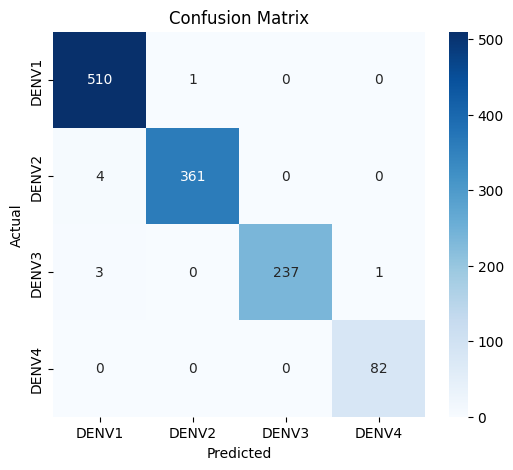

In [16]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['DENV1', 'DENV2', 'DENV3', 'DENV4'], yticklabels=['DENV1', 'DENV2', 'DENV3', 'DENV4'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


C:\Users\Bhava\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 256)                 │         173,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 214,724 (838.77 KB)

 Trainable params: 214,724 (838.77 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.3068 - loss: 28.0794 - val_accuracy: 0.7132 - val_loss: 0.8122
Epoch 2/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6084 - loss: 1.1525 - val_accuracy: 0.7153 - val_loss: 0.5741
Epoch 3/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6705 - loss: 0.8551 - val_accuracy: 0.7132 - val_loss: 0.4156
Epoch 4/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7258 - loss: 0.6768 - val_accuracy: 0.9844 - val_loss: 0.3481
Epoch 5/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7363 - loss: 0.7179 - val_accuracy: 0.9958 - val_loss: 0.2276
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       511
           1       0.99      1.00      1.00       365
           2       1.00      0.97      0.99       241
           3       1.00      1.00      1.00        82

    accuracy                     

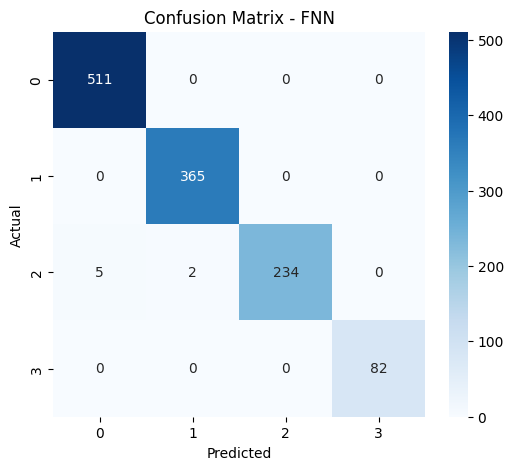

In [17]:
# fnn model
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# ----- Step 1: K-mer Encoding -----
def get_kmers(sequence, k=3):
    return ' '.join([sequence[i:i+k] for i in range(len(sequence)-k+1)])

df['kmers'] = df['sequence'].apply(lambda x: get_kmers(x, k=3))

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['kmers']).toarray()

# ----- Step 2: Label Encoding -----
le = LabelEncoder()
y = le.fit_transform(df['label'])
y_cat = to_categorical(y)

# ----- Step 3: Train-Test Split -----
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)

# ----- Step 4: FNN Model -----
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))  # 4 classes

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# ----- Step 5: Train -----
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# ----- Step 6: Evaluate -----
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# Classification Report
print("\nClassification Report:\n")
target_names = [str(cls) for cls in le.classes_]
print(classification_report(y_true, y_pred_classes, target_names=target_names))


# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - FNN')
plt.show()

In [60]:
!pip install keras


Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3464 - loss: 1.3181
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6276 - loss: 1.0080
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7278 - loss: 0.7986
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7889 - loss: 0.6573
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8621 - loss: 0.4980
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8521 - loss: 0.4607
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9002 - loss: 0.3721
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9047 - loss: 0.3113
Epoch 9/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9270 - loss: 0.2895
Epoch 10/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9133 - loss: 0.2836
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


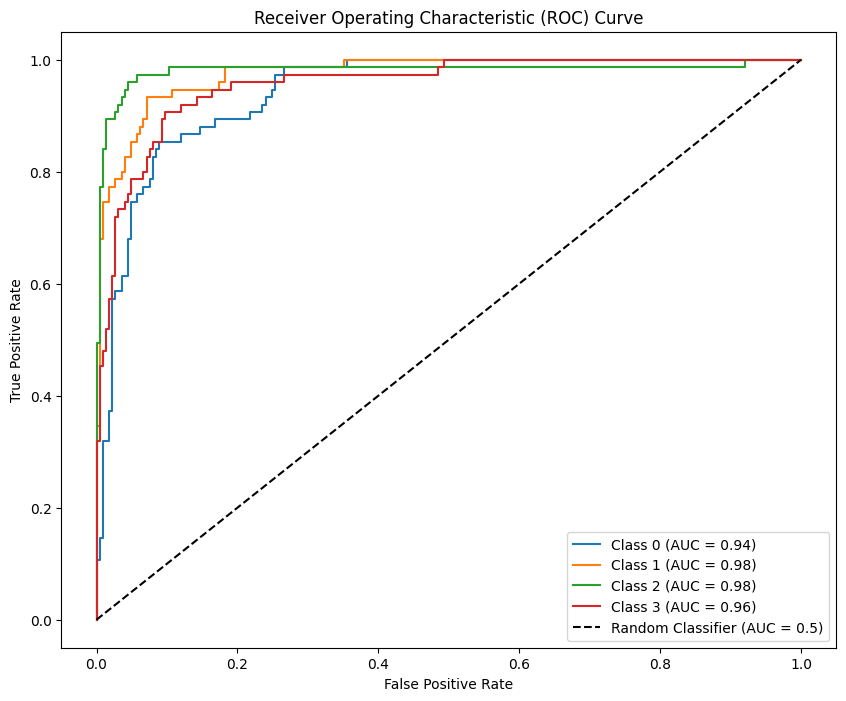

In [67]:
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.models import Model

# Step 2: Define the model using Input(shape)
input_layer = Input(shape=(X_train.shape[1],))  # This is your input shape, replace X_train.shape[1] with the correct feature size

# Now use the input_layer as the first layer in the Sequential model
x = Dense(64, activation='relu')(input_layer)
x = Dense(32, activation='relu')(x)
output_layer = Dense(y_train_bin.shape[1], activation='softmax')(x)  # Output layer with the number of classes

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 3: Train the model
model.fit(X_train, y_train_bin, epochs=10, batch_size=32)

# Step 4: Get the predicted probabilities for the test set
y_pred = model.predict(X_test)

# Step 5: Compute ROC curve and AUC for each class
fpr, tpr, roc_auc = {}, {}, {}

# Iterate through each class
for i in range(y_train_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Step 6: Plot the ROC curve for each class
plt.figure(figsize=(10, 8))

for i in range(y_train_bin.shape[1]):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



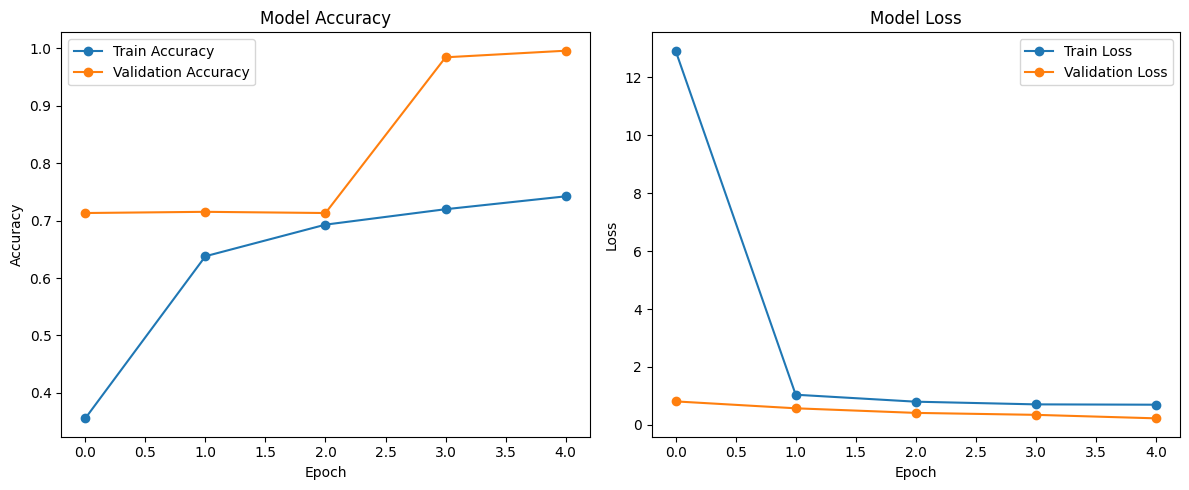

In [19]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


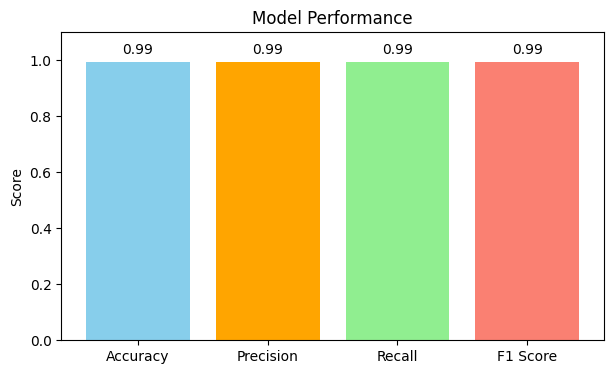

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Calculate metrics
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

# Step 2: Put them in lists
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy, precision, recall, f1]

# Step 3: Plot the bar graph
plt.figure(figsize=(7, 4))
bars = plt.bar(metrics, scores, color=['skyblue', 'orange', 'lightgreen', 'salmon'])
plt.ylim(0, 1.1)
plt.title('Model Performance')
plt.ylabel('Score')

# Add values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.03, f'{height:.2f}', ha='center')

plt.grid(False)  # remove grid
plt.show()


In [21]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))  # More neurons
model.add(Dropout(0.4))  # Higher dropout
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))  # Adjust according to your class count

optimizer = Adam(learning_rate=0.0005)  # Slower learning to improve generalization
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


C:\Users\Bhava\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
from Bio import SeqIO

def load_sequences(file_path):
    return [str(record.seq) for record in SeqIO.parse(file_path, "fasta")]

serotypes = {
    "DENV-1": load_sequences("DENV1.fasta"),
    "DENV-2": load_sequences("DENV2.fasta"),
    "DENV-3": load_sequences("DENV3.fasta"),
    "DENV-4": load_sequences("DENV4.fasta"),
}


In [23]:
def sequence_identity(seq1, seq2):
    min_len = min(len(seq1), len(seq2))
    matches = sum(a == b for a, b in zip(seq1[:min_len], seq2[:min_len]))
    return matches / min_len


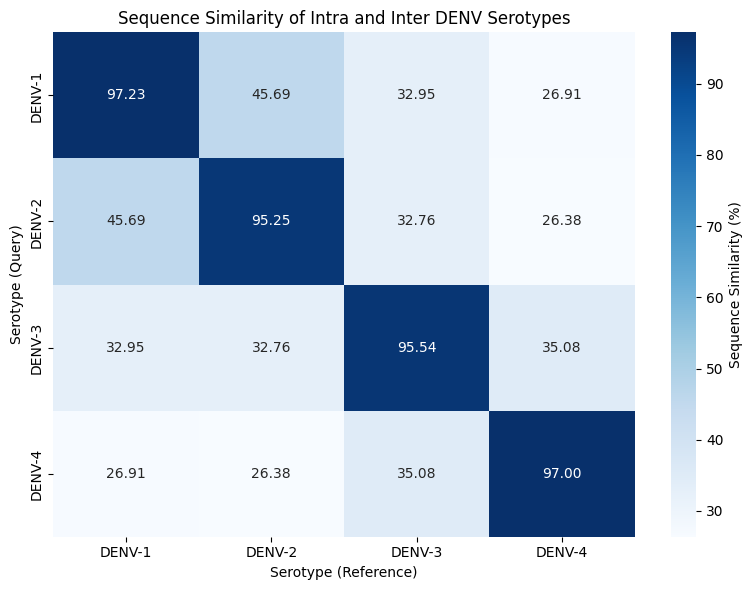

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Label to serotype map (ensure proper mapping)
label_to_serotype = {0: "DENV-1", 1: "DENV-2", 2: "DENV-3", 3: "DENV-4"}

# Make sure the label is integer and map correctly
df['label'] = df['label'].astype(int)
df['serotype'] = df['label'].map(label_to_serotype)

# Drop rows where serotype mapping failed (just in case)
df = df.dropna(subset=['serotype'])

# Group and take 5 sequences per serotype
serotype_groups = df.groupby('serotype')['sequence'].apply(lambda x: x.iloc[:5].tolist()).to_dict()

# Function to compute sequence identity
def sequence_identity(seq1, seq2):
    min_len = min(len(seq1), len(seq2))
    matches = sum(a == b for a, b in zip(seq1[:min_len], seq2[:min_len]))
    return matches / min_len

# Prepare similarity matrix
serotypes = list(serotype_groups.keys())
similarity_matrix = pd.DataFrame(index=serotypes, columns=serotypes, dtype=float)

# Compute average pairwise similarity
for sero1 in serotypes:
    for sero2 in serotypes:
        similarities = [sequence_identity(s1, s2) for s1 in serotype_groups[sero1] for s2 in serotype_groups[sero2]]
        avg_similarity = sum(similarities) / len(similarities)
        similarity_matrix.loc[sero1, sero2] = round(avg_similarity * 100, 2)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, annot=True, fmt=".2f", cmap="Blues", cbar_kws={'label': 'Sequence Similarity (%)'})
plt.title("Sequence Similarity of Intra and Inter DENV Serotypes")
plt.xlabel("Serotype (Reference)")
plt.ylabel("Serotype (Query)")
plt.tight_layout()
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.45      1.00      0.62       511
           1       1.00      0.10      0.17       365
           2       1.00      0.08      0.15       241
           3       1.00      0.02      0.05        82

    accuracy                           0.47      1199
   macro avg       0.86      0.30      0.25      1199
weighted avg       0.76      0.47      0.35      1199



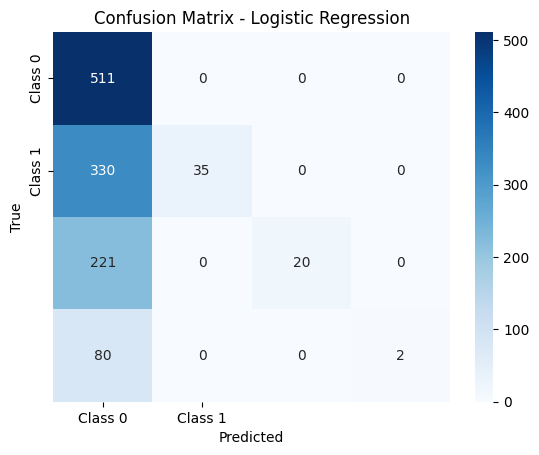

In [25]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


# Assuming 'sequence' is your feature and 'label' is your target
X = df['sequence']
y = df['label']

# Convert text data to numerical features using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=10000)
X_tfidf = vectorizer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)

# Train the model
lr_model.fit(X_train, y_train)

# Predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()



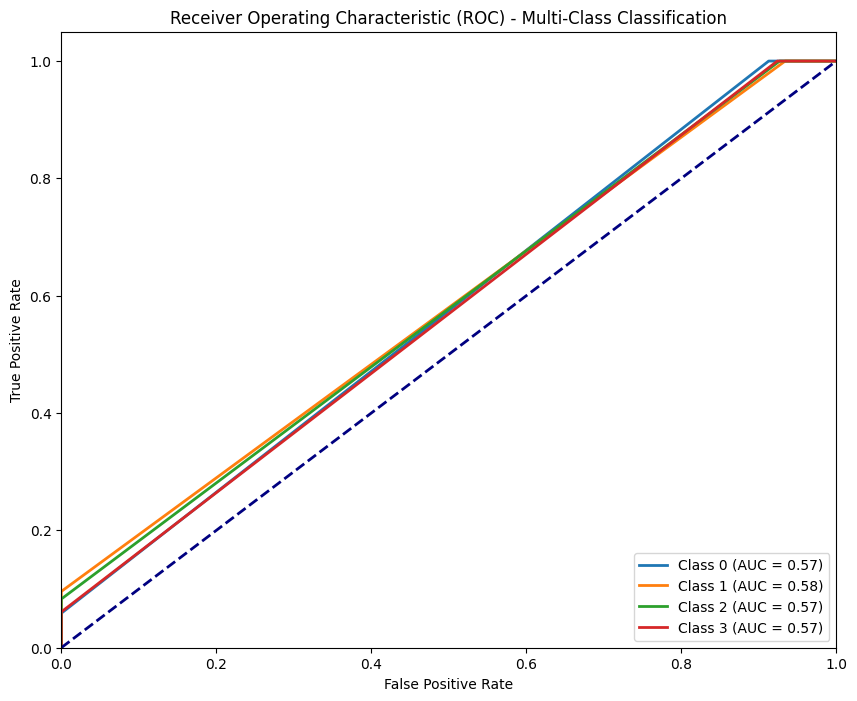

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

# Assuming y_test and y_pred are already defined

# Binarize the output labels for multi-class ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])  # Binarize labels for 4 classes (DENV-1, DENV-2, DENV-3, DENV-4)
y_pred_prob = lr_model.predict_proba(X_test)  # Get probability predictions

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate ROC curve and AUC for each class
for i in range(4):  # Start from class 0
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))

# Plot ROC curve for each class starting from Class 0
for i in range(4):  # Starting from Class 0 (DENV-1)
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot the diagonal (random classifier)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Customizing the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Multi-Class Classification')
plt.legend(loc='lower right')

# Show plot
plt.show()


In [27]:
#Decission Tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Probability estimates for ROC curve
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]  # For class 1


In [28]:
# Generate classification report
report = classification_report(y_test, y_pred_dt, target_names=['DENV-1', 'DENV-2', 'DENV-3', 'DENV-4'])
print("Classification Report for Decision Tree Classifier:")
print(report)


Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

      DENV-1       0.45      1.00      0.62       511
      DENV-2       1.00      0.10      0.17       365
      DENV-3       1.00      0.08      0.15       241
      DENV-4       1.00      0.06      0.11        82

    accuracy                           0.48      1199
   macro avg       0.86      0.31      0.27      1199
weighted avg       0.77      0.48      0.36      1199



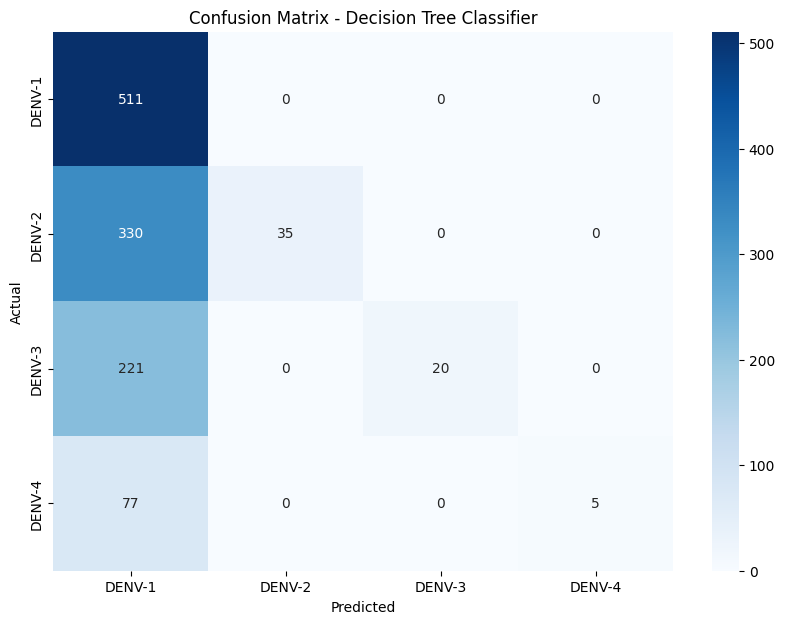

In [29]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['DENV-1', 'DENV-2', 'DENV-3', 'DENV-4'], yticklabels=['DENV-1', 'DENV-2', 'DENV-3', 'DENV-4'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()


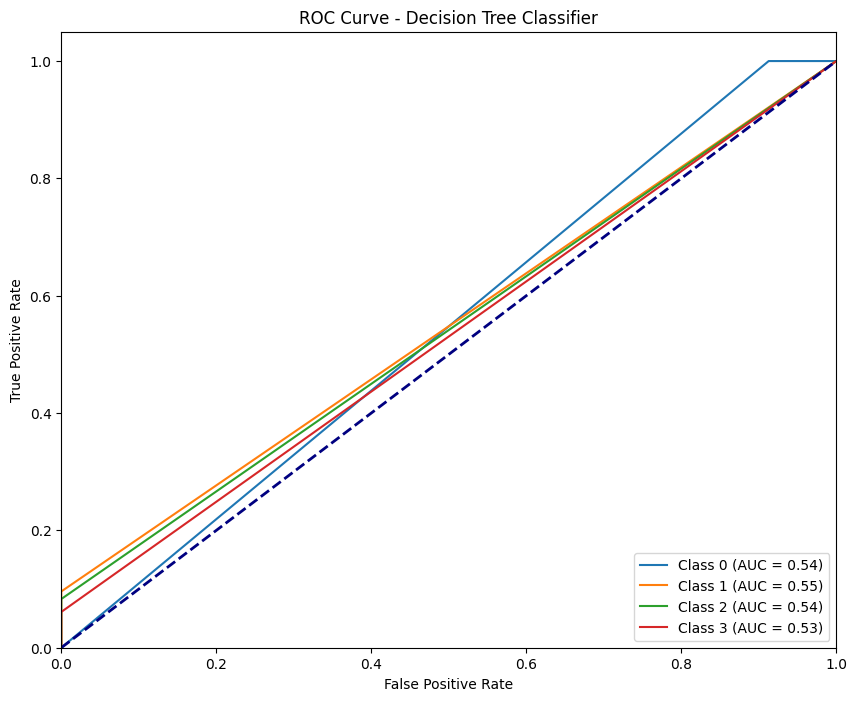

In [30]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for all classes
y_prob_dt = dt_model.predict_proba(X_test)

# Initialize lists to store the false positive rates, true positive rates, and AUC values for each class
fpr = {}
tpr = {}
roc_auc = {}

# For each class (0, 1, 2, 3)
for i in range(4):  # For class 0, class 1, class 2, class 3
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob_dt[:, i])  # Treating each class as binary
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all the ROC curves
plt.figure(figsize=(10, 8))

for i in range(4):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree Classifier')
plt.legend(loc='lower right')
plt.show()


In [31]:
pip install imbalanced-learn



[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: C:\Users\Bhava\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [32]:
# ===== STEP 0: Imports =====
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense

# ===== STEP 1: DNA Sequence Encoding Function =====
def encode_sequence(seq):
    mapping = {'A': 1, 'C': 2, 'G': 3, 'T': 4}
    return [mapping.get(base, 0) for base in seq]

# ===== STEP 2: Load and Encode Dataset =====
# Assume your DataFrame 'df' has 'sequence' and 'label' columns
# Example:
# df = pd.read_csv('your_dataset.csv')  # Uncomment if loading from CSV

df['encoded'] = df['sequence'].apply(encode_sequence)

# ===== STEP 3: Pad Sequences =====
MAX_LEN = 1000
X = pad_sequences(df['encoded'], maxlen=MAX_LEN, padding='post')
X = np.array(X, dtype=np.int32)

# ===== STEP 4: Labels =====
y = df['label'].values

# ===== STEP 5: Split Dataset =====
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ===== STEP 6: Build Bidirectional LSTM Model =====
model = Sequential([
    Embedding(input_dim=5, output_dim=128),  # 4 DNA bases + 1 padding index (0)
    Bidirectional(LSTM(64)),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')  # For 4 DENV classes
])

# ===== STEP 7: Compile Model =====
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# ===== STEP 8: Train Model =====
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=64
)

# ===== STEP 9: Evaluate Model =====
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# ===== STEP 10: Report Classification Metrics =====
print(classification_report(y_test, y_pred, digits=4))


Epoch 1/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 258s 4s/step - accuracy: 0.6100 - loss: 0.9943 - val_accuracy: 0.9958 - val_loss: 0.0302
Epoch 2/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 268s 4s/step - accuracy: 0.9951 - loss: 0.0178 - val_accuracy: 0.9969 - val_loss: 0.0100
Epoch 3/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 267s 4s/step - accuracy: 0.9962 - loss: 0.0115 - val_accuracy: 0.9969 - val_loss: 0.0080
Epoch 4/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 268s 4s/step - accuracy: 0.9960 - loss: 0.0114 - val_accuracy: 0.9969 - val_loss: 0.0080
Epoch 5/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 262s 4s/step - accuracy: 0.9954 - loss: 0.0118 - val_accuracy: 0.9969 - val_loss: 0.0077
38/38 ━━━━━━━━━━━━━━━━━━━━ 14s 346ms/step
              precision    recall  f1-score   support

           0     1.0000    0.9980    0.9990       511
           1     0.9918    1.0000    0.9959       365
           2     1.0000    0.9917    0.9958       241
           3     1.0000    1.0000    1.0000        82

    accuracy                         0.9975      1199
  

38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 321ms/step


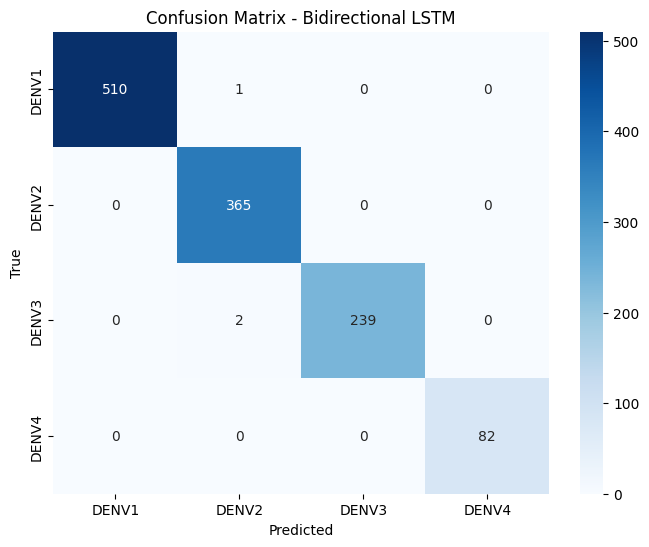

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Step 1: Predict class labels
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)

# Step 2: Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 3: Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'DENV{i+1}' for i in range(4)],
            yticklabels=[f'DENV{i+1}' for i in range(4)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Bidirectional LSTM')
plt.show()


In [34]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Assume y_test and y_pred are available
cm = confusion_matrix(y_test, y_pred)
n_classes = cm.shape[0]

sensitivity = []
specificity = []

for i in range(n_classes):
    TP = cm[i, i]
    FN = np.sum(cm[i, :]) - TP
    FP = np.sum(cm[:, i]) - TP
    TN = np.sum(cm) - (TP + FP + FN)

    sens = TP / (TP + FN) if (TP + FN) > 0 else 0
    spec = TN / (TN + FP) if (TN + FP) > 0 else 0

    sensitivity.append(sens)
    specificity.append(spec)

    print(f"Class {i+1} - Sensitivity: {sens:.4f}, Specificity: {spec:.4f}")

print(f"\nAverage Sensitivity: {np.mean(sensitivity):.4f}")
print(f"Average Specificity: {np.mean(specificity):.4f}")


Class 1 - Sensitivity: 0.9980, Specificity: 1.0000
Class 2 - Sensitivity: 1.0000, Specificity: 0.9964
Class 3 - Sensitivity: 0.9917, Specificity: 1.0000
Class 4 - Sensitivity: 1.0000, Specificity: 1.0000

Average Sensitivity: 0.9974
Average Specificity: 0.9991


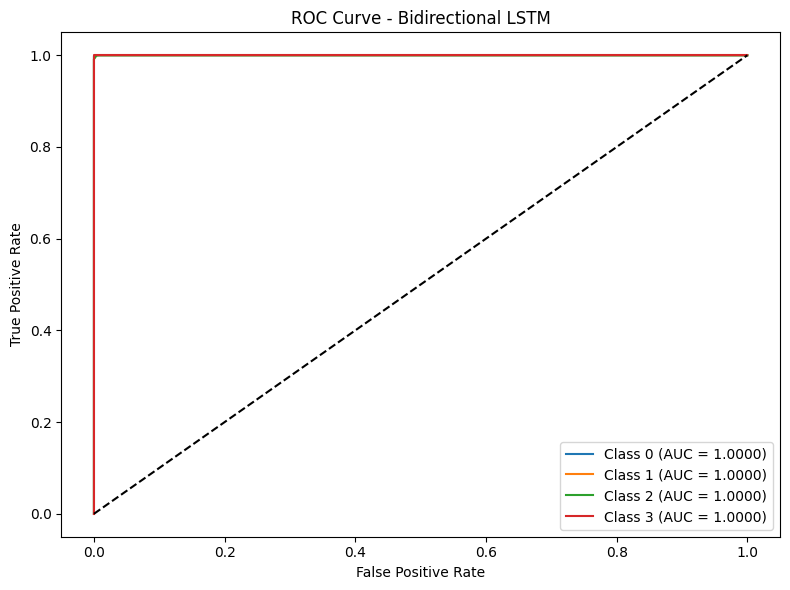

In [35]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize labels: Ensure classes are 0, 1, 2, 3
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
n_classes = y_test_bin.shape[1]

# Predicted probabilities must be available from model.predict(X_test)
fpr, tpr, roc_auc = {}, {}, {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.4f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Bidirectional LSTM')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences

# --- Step 1: Encode DNA sequences ---
def encode_sequence(seq):
    mapping = {'A': 1, 'C': 2, 'G': 3, 'T': 4}
    return [mapping.get(base, 0) for base in seq]

df['encoded'] = df['sequence'].apply(encode_sequence)

# --- Step 2: Pad sequences ---
MAX_LEN = 1000
X = pad_sequences(df['encoded'], maxlen=MAX_LEN, padding='post')
y = df['label'].values

# --- Step 3: Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Step 4: Define CNN model ---
vocab_size = 5  # 0 (padding) + ACGT (1-4)
embedding_dim = 128
num_classes = len(np.unique(y))

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    Conv1D(filters=64, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# --- Step 5: Compile and train ---
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=64)

# --- Step 6: Evaluate ---
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))


Epoch 1/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 23s 314ms/step - accuracy: 0.6387 - loss: 0.9586 - val_accuracy: 0.9969 - val_loss: 0.0083
Epoch 2/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 17s 291ms/step - accuracy: 0.9942 - loss: 0.0171 - val_accuracy: 0.9969 - val_loss: 0.0072
Epoch 3/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 18s 292ms/step - accuracy: 0.9924 - loss: 0.0138 - val_accuracy: 0.9969 - val_loss: 0.0068
Epoch 4/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 18s 298ms/step - accuracy: 0.9942 - loss: 0.0121 - val_accuracy: 0.9969 - val_loss: 0.0072
Epoch 5/5
60/60 ━━━━━━━━━━━━━━━━━━━━ 18s 295ms/step - accuracy: 0.9955 - loss: 0.0121 - val_accuracy: 0.9969 - val_loss: 0.0070
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step

Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.9980    0.9990       511
           1     0.9918    1.0000    0.9959       365
           2     1.0000    0.9917    0.9958       241
           3     1.0000    1.0000    1.0000        82

    accuracy            

In [37]:
from sklearn.metrics import confusion_matrix

# Step 1: Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_mat)

# Step 2: Sensitivity (Recall) and Specificity Calculation
num_classes = conf_mat.shape[0]
sensitivity_list = []
specificity_list = []

for i in range(num_classes):
    TP = conf_mat[i, i]
    FN = conf_mat[i, :].sum() - TP
    FP = conf_mat[:, i].sum() - TP
    TN = conf_mat.sum() - (TP + FN + FP)
    
    sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
    
    sensitivity_list.append(sensitivity)
    specificity_list.append(specificity)
    
    print(f"\nClass {i} - Sensitivity (Recall): {sensitivity:.4f}, Specificity: {specificity:.4f}")

# Step 3: Average metrics
avg_sensitivity = sum(sensitivity_list) / num_classes
avg_specificity = sum(specificity_list) / num_classes

print(f"\nAverage Sensitivity: {avg_sensitivity:.4f}")
print(f"Average Specificity: {avg_specificity:.4f}")


Confusion Matrix:
 [[510   1   0   0]
 [  0 365   0   0]
 [  0   2 239   0]
 [  0   0   0  82]]

Class 0 - Sensitivity (Recall): 0.9980, Specificity: 1.0000

Class 1 - Sensitivity (Recall): 1.0000, Specificity: 0.9964

Class 2 - Sensitivity (Recall): 0.9917, Specificity: 1.0000

Class 3 - Sensitivity (Recall): 1.0000, Specificity: 1.0000

Average Sensitivity: 0.9974
Average Specificity: 0.9991


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


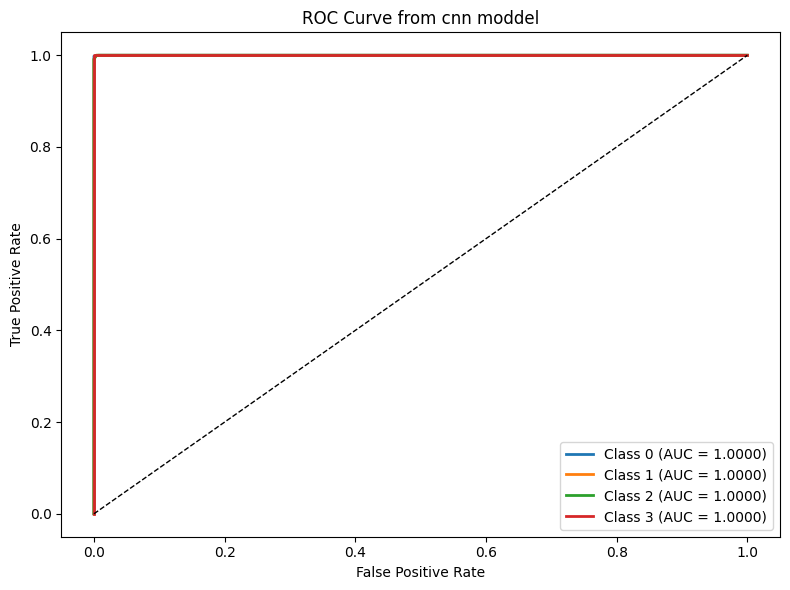

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense

# Step 1: Binarize the labels for multi-class ROC
n_classes = 4  # Change this to the number of classes in your dataset
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])  # Binarize the true labels

# Step 2: Get the predicted probabilities for each class
y_pred_probs = model.predict(X_test)  # Replace `model` with your trained CNN model

# Step 3: Calculate ROC curve and AUC for each class
fpr, tpr, roc_auc = {}, {}, {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Step 4: Plot ROC curve for each class
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.4f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve from cnn moddel')
plt.legend(loc="lower right")
plt.grid(False)  # Remove gridlines
plt.tight_layout()
plt.show()


KNN Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       511
           1       1.00      0.99      0.99       365
           2       1.00      0.99      1.00       241
           3       1.00      1.00      1.00        82

    accuracy                           0.99      1199
   macro avg       1.00      1.00      1.00      1199
weighted avg       1.00      0.99      0.99      1199



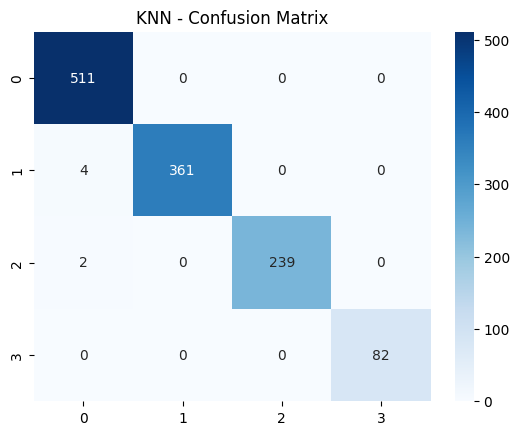

In [39]:
#knn
from sklearn.neighbors import KNeighborsClassifier

# Model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("KNN Classification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("KNN - Confusion Matrix")
plt.show()


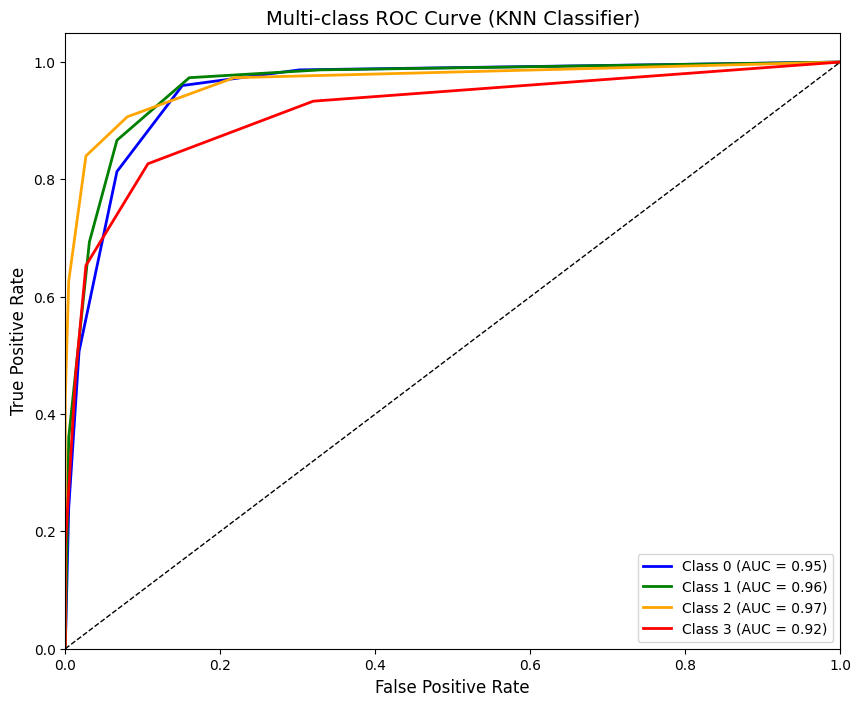

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Step 1: Generate synthetic multi-class data
X, y = make_classification(n_samples=1000, n_classes=4, n_informative=6,
                           n_clusters_per_class=1, n_redundant=0,
                           random_state=42)

# Step 2: Binarize the output
y_bin = label_binarize(y, classes=[0, 1, 2, 3])
n_classes = y_bin.shape[1]

# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    test_size=0.3,
                                                    random_state=42)

# Step 4: Train the classifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

# Step 5: Get predicted probabilities
y_score = clf.predict_proba(X_test)

# Binarize y_test for ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])

# Step 6: Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Step 7: Plot ROC curves (without grid)
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'orange', 'red']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Multi-class ROC Curve (KNN Classifier)', fontsize=14)
plt.legend(loc="lower right")
plt.show()



Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        75
           1       0.79      0.80      0.79        75
           2       0.82      0.87      0.84        75
           3       0.76      0.71      0.73        75

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300



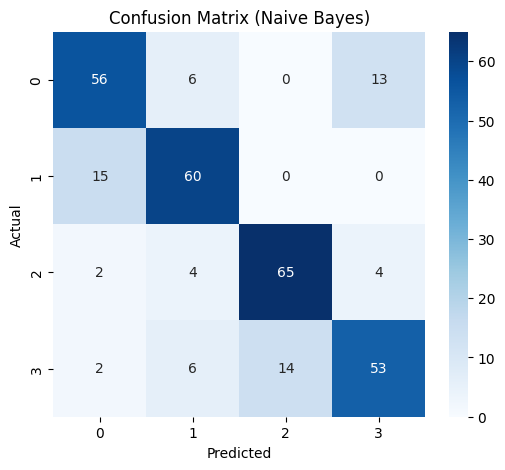

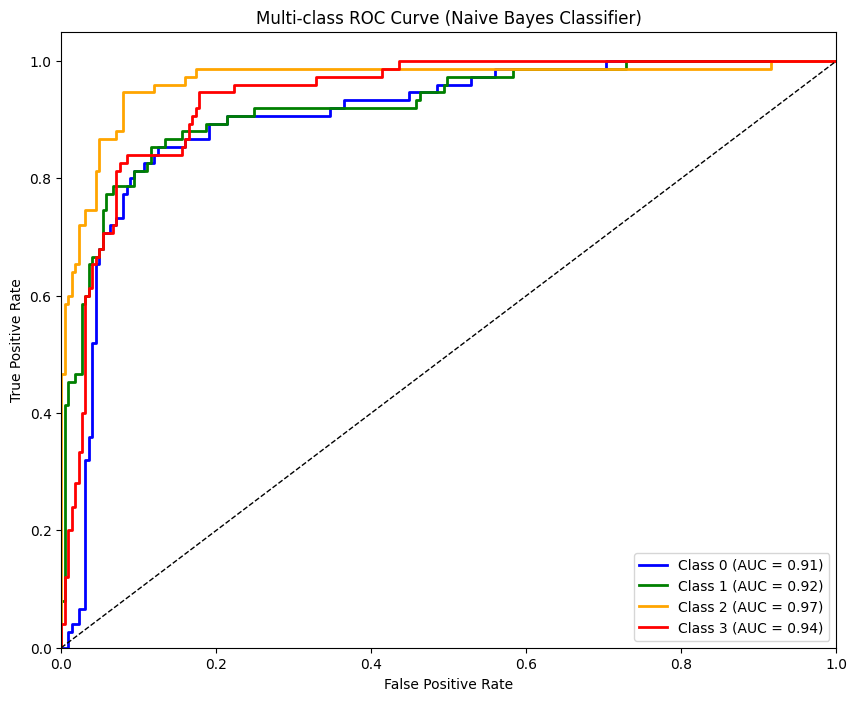

In [41]:
#naive bayes
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# Step 1: Train/Test Split (If not already done)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 2: Train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = nb_model.predict(X_test)
y_pred_prob = nb_model.predict_proba(X_test)  # Probabilities for ROC AUC

# Step 4: Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 5: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(4), yticklabels=range(4))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Naive Bayes)')
plt.show()

# Step 6: ROC Curve (One-vs-Rest for multi-class)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Step 7: Plot ROC curves
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'orange', 'red']
for i in range(4):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve (Naive Bayes Classifier)')
plt.legend(loc="lower right")
plt.show()



Classification Report (KMeans):
              precision    recall  f1-score   support

           0       0.66      0.64      0.65       175
           1       0.57      0.45      0.50       174
           2       0.63      0.59      0.61       175
           3       0.43      0.56      0.49       176

    accuracy                           0.56       700
   macro avg       0.57      0.56      0.56       700
weighted avg       0.57      0.56      0.56       700



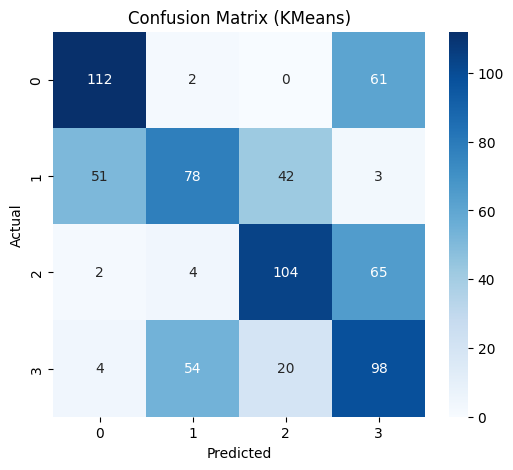

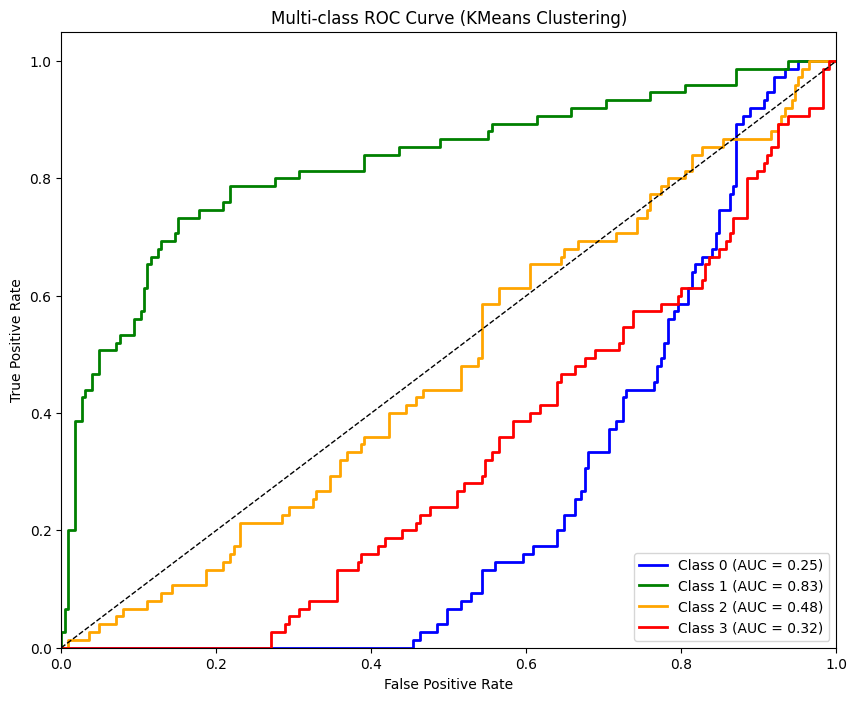

In [42]:
#k-means
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

# Step 1: Train KMeans model
kmeans = KMeans(n_clusters=4, random_state=42)
y_pred = kmeans.fit_predict(X_train)

# Step 2: Map predicted clusters to true classes
# Get the most frequent true class for each cluster (label)
# Using the confusion matrix to align the predicted clusters to true classes
conf_matrix = confusion_matrix(y_train, y_pred)
cluster_to_class = np.argmax(conf_matrix, axis=0)

# Step 3: Map the predicted cluster labels to actual class labels
y_pred_mapped = np.array([cluster_to_class[i] for i in y_pred])

# Step 4: Classification Report
print("\nClassification Report (KMeans):")
print(classification_report(y_train, y_pred_mapped))

# Step 5: Confusion Matrix
conf_matrix_mapped = confusion_matrix(y_train, y_pred_mapped)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_mapped, annot=True, fmt='d', cmap='Blues', xticklabels=range(4), yticklabels=range(4))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (KMeans)')
plt.show()

# Step 6: ROC Curve (One-vs-Rest for multi-class)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])

fpr = dict()
tpr = dict()
roc_auc = dict()

# Predict cluster probabilities using kmeans model
y_pred_prob = kmeans.transform(X_test)

# Use predicted clusters to compute the ROC curve
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], -y_pred_prob[:, i])  # Inverse because lower distances are better
    roc_auc[i] = auc(fpr[i], tpr[i])

# Step 7: Plot ROC curves
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'orange', 'red']
for i in range(4):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve (KMeans Clustering)')
plt.legend(loc="lower right")
plt.show()



Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.82      0.79      0.80        75
           1       0.89      0.88      0.89        75
           2       0.88      0.95      0.91        75
           3       0.81      0.79      0.80        75

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



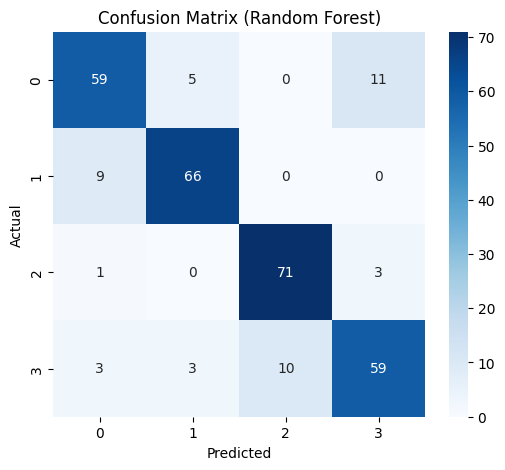

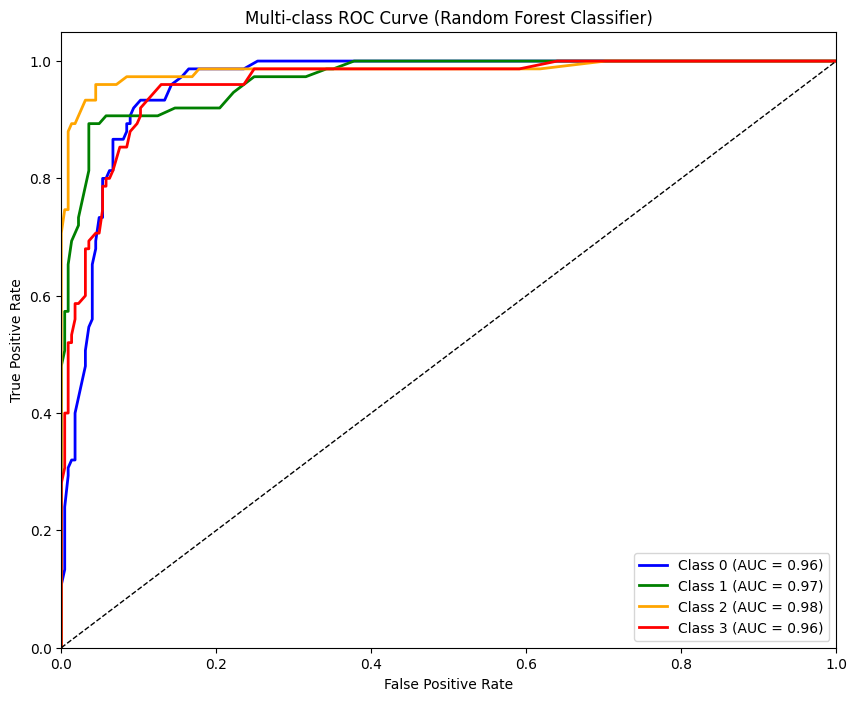

In [43]:
#random forest classifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Step 1: Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 2: Make predictions
y_pred = rf_model.predict(X_test)
y_pred_prob = rf_model.predict_proba(X_test)  # Probabilities for ROC AUC

# Step 3: Classification Report
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred))

# Step 4: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(4), yticklabels=range(4))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

# Step 5: ROC Curve (One-vs-Rest for multi-class)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Step 6: Plot ROC curves
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'orange', 'red']
for i in range(4):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve (Random Forest Classifier)')
plt.legend(loc="lower right")
plt.show()


Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        75
           1       0.94      0.85      0.90        75
           2       0.89      0.96      0.92        75
           3       0.88      0.84      0.86        75

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300



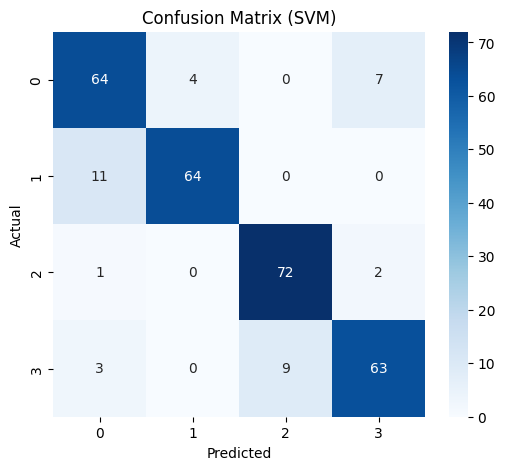

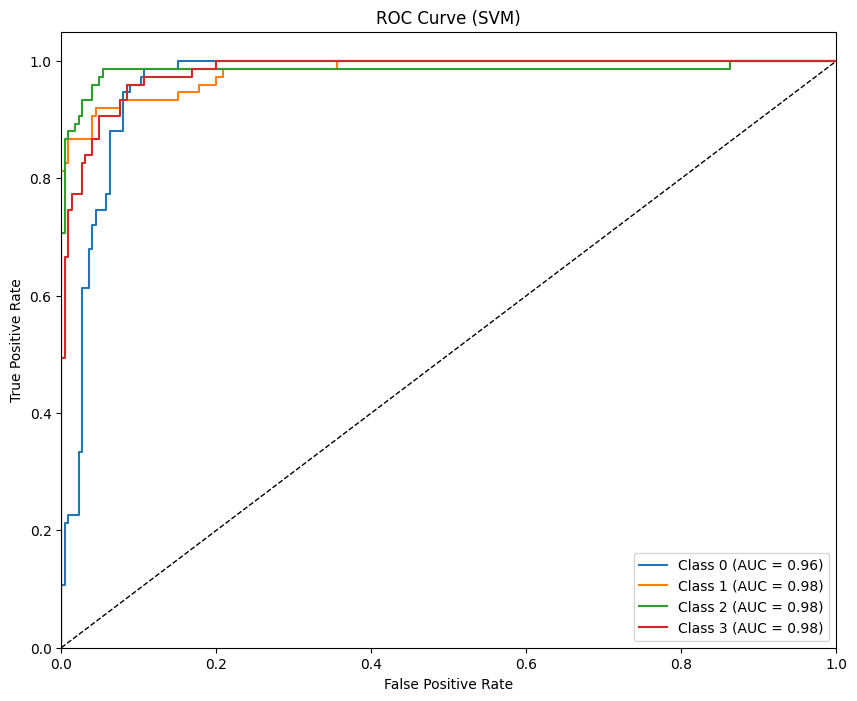

In [44]:
#svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Train Support Vector Machine
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)
y_pred_prob = svm_model.predict_proba(X_test)

# Classification Report
print("Classification Report (SVM):")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(4), yticklabels=range(4))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (SVM)')
plt.show()

# ROC Curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
fpr, tpr, roc_auc = {}, {}, {}
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(4):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (SVM)')
plt.legend(loc="lower right")
plt.show()


Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        75
           1       0.90      0.88      0.89        75
           2       0.91      0.96      0.94        75
           3       0.84      0.79      0.81        75

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



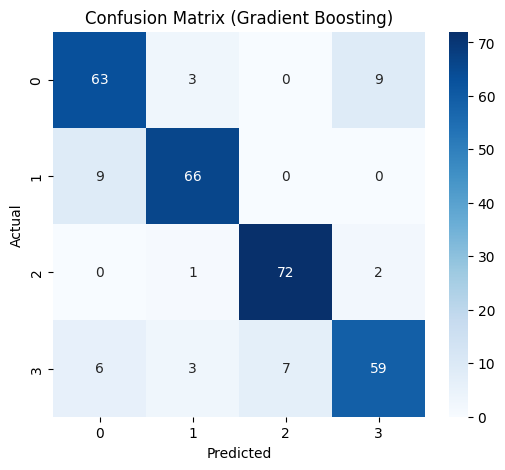

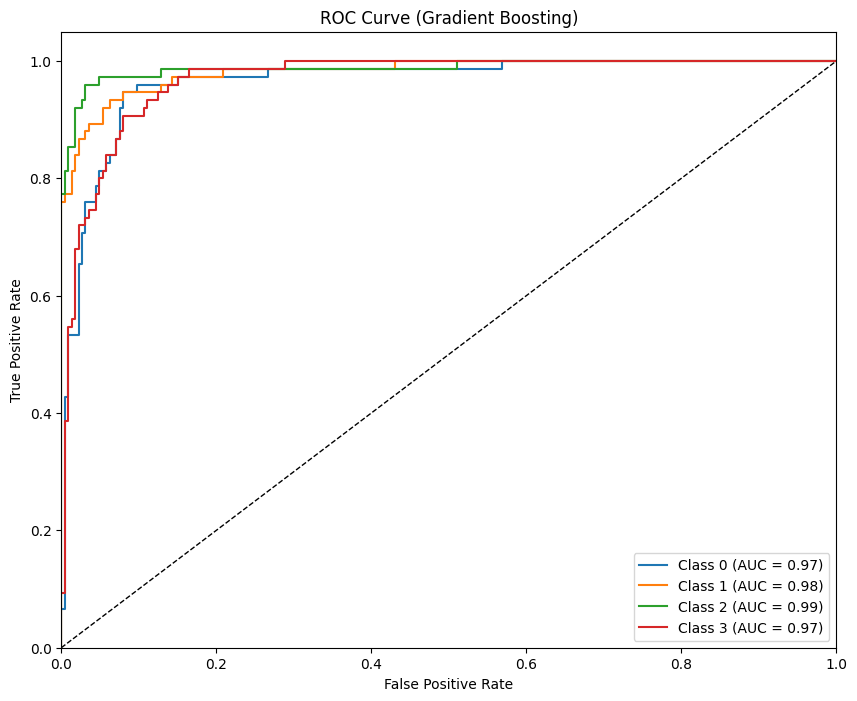

In [45]:
#gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
y_pred = gb_model.predict(X_test)
y_pred_prob = gb_model.predict_proba(X_test)

# Classification Report
print("Classification Report (Gradient Boosting):")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(4), yticklabels=range(4))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Gradient Boosting)')
plt.show()

# ROC Curve
fpr, tpr, roc_auc = {}, {}, {}
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(4):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Gradient Boosting)')
plt.legend(loc="lower right")
plt.show()


C:\Users\Bhava\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Classification Report (AdaBoost):
              precision    recall  f1-score   support

           0       0.65      0.56      0.60        75
           1       0.72      0.76      0.74        75
           2       0.81      0.76      0.79        75
           3       0.63      0.72      0.67        75

    accuracy                           0.70       300
   macro avg       0.70      0.70      0.70       300
weighted avg       0.70      0.70      0.70       300



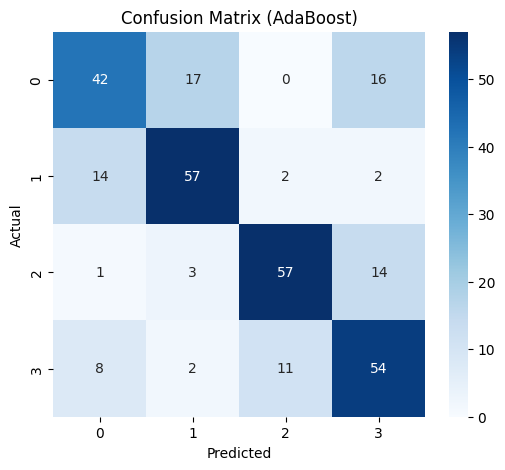

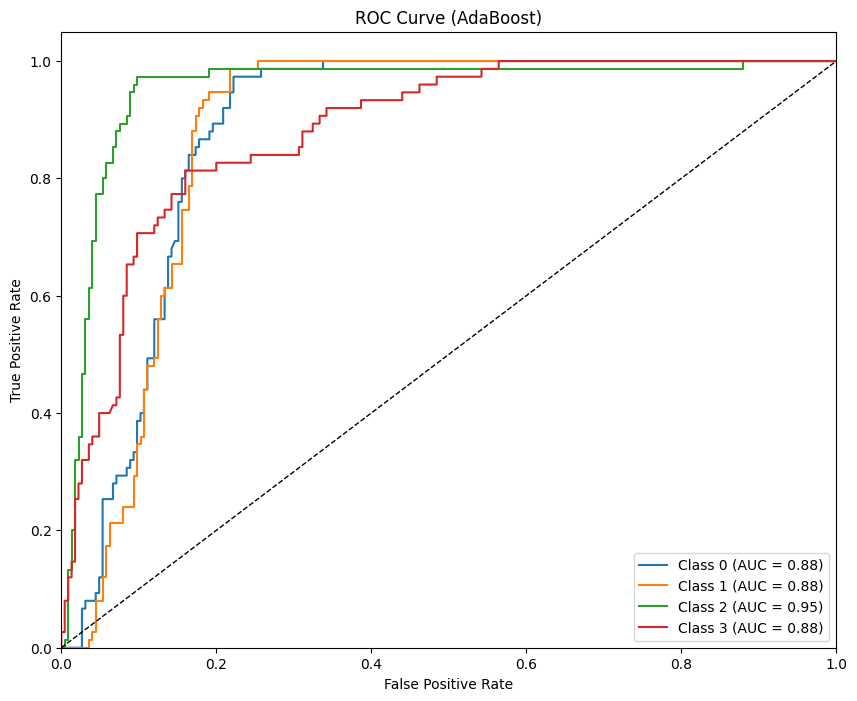

In [46]:
#ada boost classifier
from sklearn.ensemble import AdaBoostClassifier

# Train AdaBoost
ab_model = AdaBoostClassifier(random_state=42)
ab_model.fit(X_train, y_train)

# Predictions
y_pred = ab_model.predict(X_test)
y_pred_prob = ab_model.predict_proba(X_test)

# Classification Report
print("Classification Report (AdaBoost):")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(4), yticklabels=range(4))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (AdaBoost)')
plt.show()

# ROC Curve
fpr, tpr, roc_auc = {}, {}, {}
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(4):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AdaBoost)')
plt.legend(loc="lower right")
plt.show()


Classification Report (Extra Trees):
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        75
           1       0.92      0.88      0.90        75
           2       0.87      0.95      0.90        75
           3       0.84      0.76      0.80        75

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



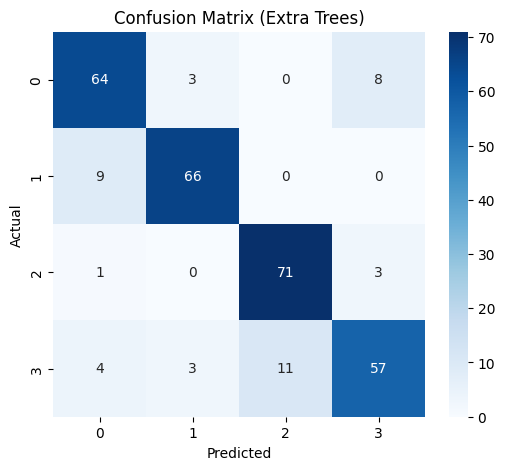

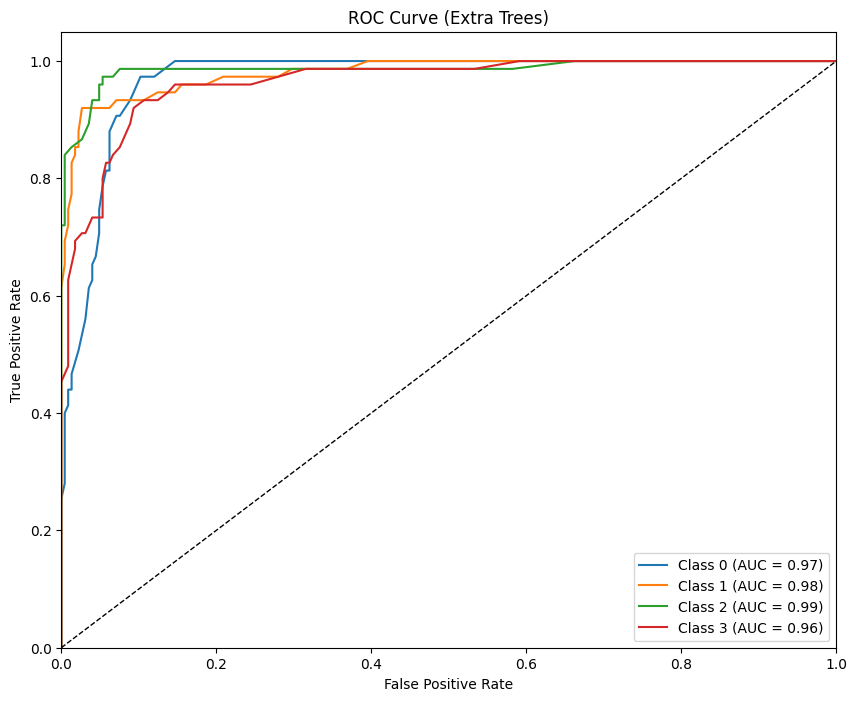

In [47]:
#extra tree classifier
from sklearn.ensemble import ExtraTreesClassifier

# Train Extra Trees
et_model = ExtraTreesClassifier(random_state=42)
et_model.fit(X_train, y_train)

# Predictions
y_pred = et_model.predict(X_test)
y_pred_prob = et_model.predict_proba(X_test)

# Classification Report
print("Classification Report (Extra Trees):")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(4), yticklabels=range(4))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Extra Trees)')
plt.show()

# ROC Curve
fpr, tpr, roc_auc = {}, {}, {}
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(4):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Extra Trees)')
plt.legend(loc="lower right")
plt.show()


Classification Report (Voting Classifier):
              precision    recall  f1-score   support

           0       0.82      0.77      0.79        75
           1       0.85      0.88      0.86        75
           2       0.90      0.95      0.92        75
           3       0.82      0.79      0.80        75

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



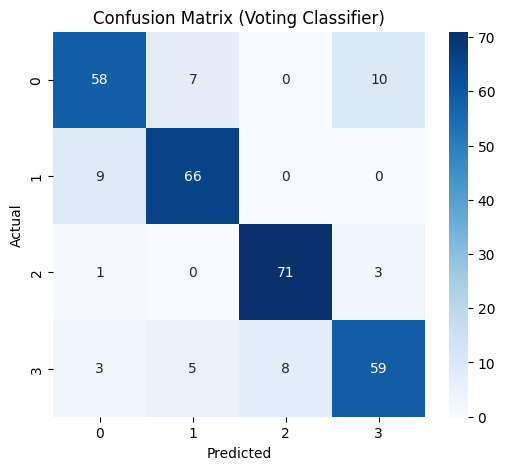

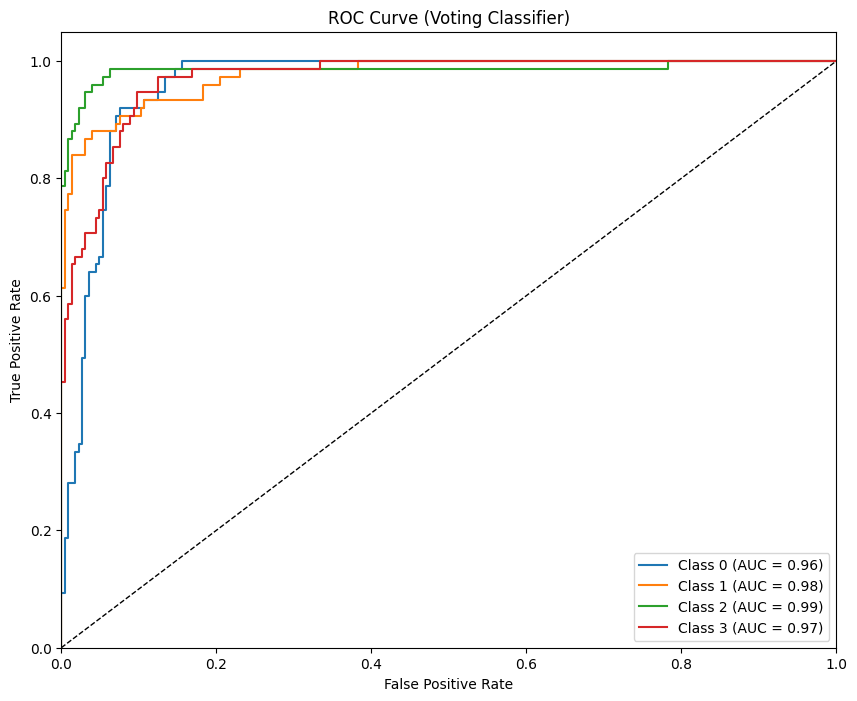

In [48]:
#voting classifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Create individual models
logreg = LogisticRegression()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()

# Create the Voting Classifier
voting_model = VotingClassifier(estimators=[('logreg', logreg), ('knn', knn), ('rf', rf)], voting='soft')

# Train Voting Classifier
voting_model.fit(X_train, y_train)

# Predictions
y_pred = voting_model.predict(X_test)
y_pred_prob = voting_model.predict_proba(X_test)

# Classification Report
print("Classification Report (Voting Classifier):")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(4), yticklabels=range(4))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Voting Classifier)')
plt.show()

# ROC Curve
fpr, tpr, roc_auc = {}, {}, {}
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(4):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Voting Classifier)')
plt.legend(loc="lower right")
plt.show()


Classification Report (Bagging Classifier):
              precision    recall  f1-score   support

           0       0.78      0.77      0.78        75
           1       0.85      0.84      0.85        75
           2       0.91      0.93      0.92        75
           3       0.81      0.81      0.81        75

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



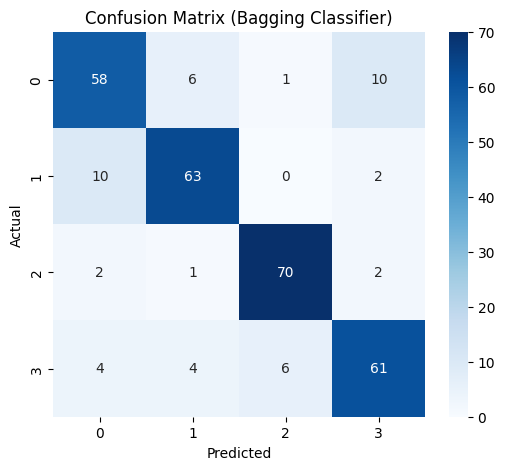

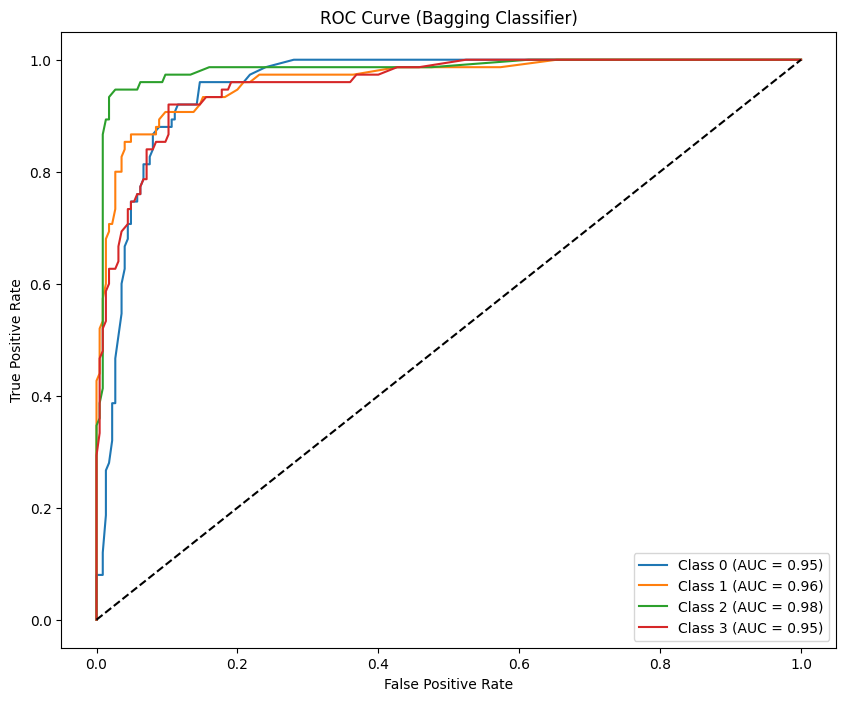

In [49]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Binarize labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])

# Updated for scikit-learn 1.2+
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),  # Use 'estimator' instead of 'base_estimator'
    n_estimators=100,
    random_state=42
)
bagging_model.fit(X_train, y_train)

# Predict
y_pred = bagging_model.predict(X_test)
y_pred_prob = bagging_model.predict_proba(X_test)

# Classification Report
print("Classification Report (Bagging Classifier):")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Bagging Classifier)")
plt.show()

# ROC Curve and AUC
fpr, tpr, roc_auc = {}, {}, {}
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(4):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Bagging Classifier)")
plt.legend(loc="lower right")
plt.show()


Classification Report (MLPClassifier):
              precision    recall  f1-score   support

           0       0.80      0.71      0.75        75
           1       0.84      0.83      0.83        75
           2       0.81      0.97      0.88        75
           3       0.80      0.75      0.77        75

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300



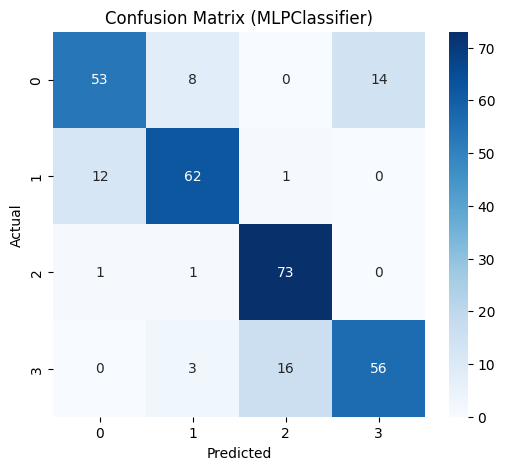

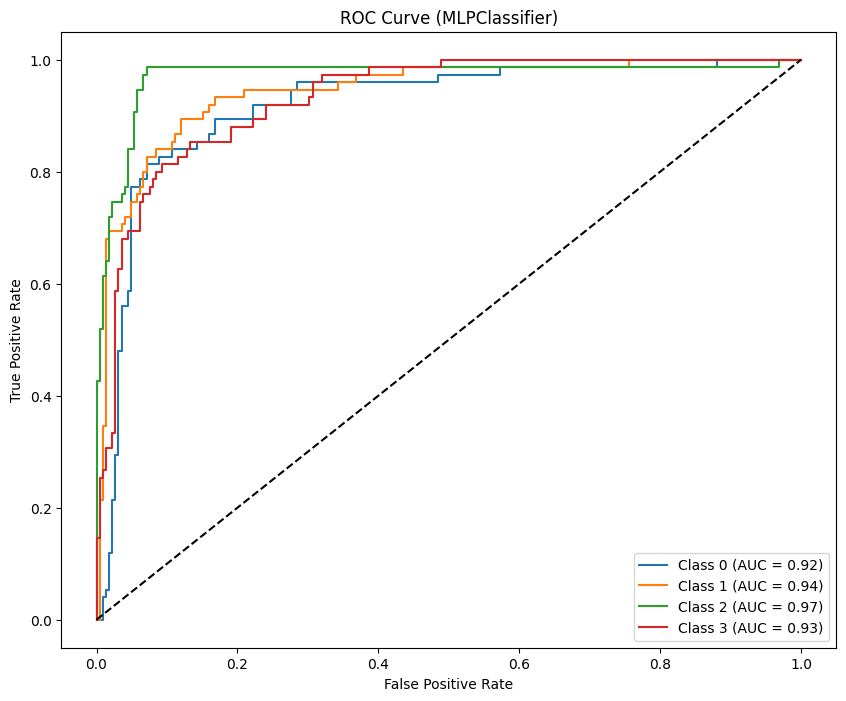

In [50]:
# mlp classifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Binarize the labels for multi-class ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])

# Define and train MLPClassifier with updated parameters
mlp = MLPClassifier(
    hidden_layer_sizes=(100,),       # 1 hidden layer with 100 neurons
    max_iter=1000,                   # Increased max iterations
    early_stopping=True,             # Stop early if validation score doesn't improve
    learning_rate_init=0.001,        # Set a smaller learning rate
    random_state=42
)
mlp.fit(X_train, y_train)

# Predictions
y_pred = mlp.predict(X_test)
y_pred_prob = mlp.predict_proba(X_test)

# Classification report
print("Classification Report (MLPClassifier):")
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (MLPClassifier)")
plt.show()

# ROC curve and AUC
fpr, tpr, roc_auc = {}, {}, {}
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(4):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (MLPClassifier)")
plt.legend(loc="lower right")
plt.show()


Classification Report (Ridge Classifier):
              precision    recall  f1-score   support

           0       0.79      0.61      0.69        75
           1       0.89      0.85      0.87        75
           2       0.79      0.99      0.88        75
           3       0.76      0.77      0.77        75

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.80       300
weighted avg       0.81      0.81      0.80       300



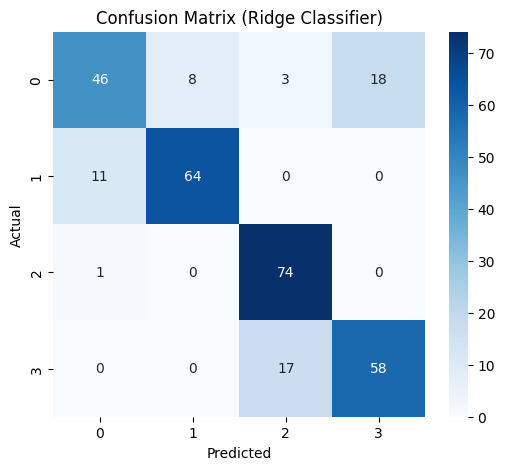

In [51]:
#ridge classifier
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize

# Ridge Classifier Model
ridge = RidgeClassifier()
ridge.fit(X_train, y_train)

# Predictions
y_pred = ridge.predict(X_test)
y_pred_prob = ridge.decision_function(X_test)  # Using decision function for continuous output

# Classification report
print("Classification Report (Ridge Classifier):")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Ridge Classifier)")
plt.show()


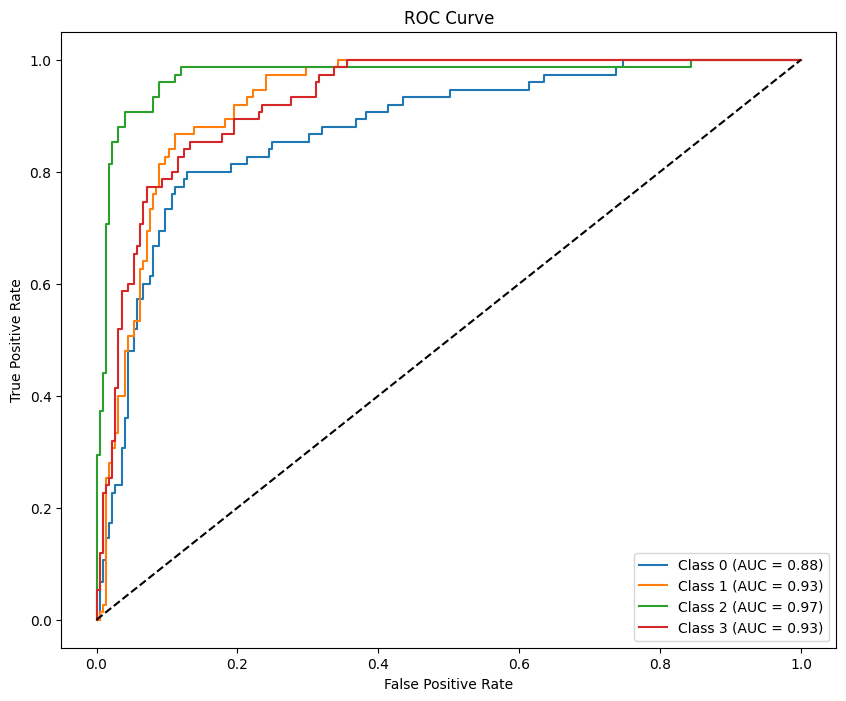

In [52]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Correcting the y_test_bin and y_pred_prob shape mismatch issue

# For each model, after making predictions and calculating probabilities, 
# you need to binarize your y_test and compute ROC for each class.
# This is a corrected implementation:

fpr, tpr, roc_auc = {}, {}, {}

y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])  # Binarize the true labels

for i in range(4):
    # For each class, get the ROC curve
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])  # Using prob for each class
    roc_auc[i] = auc(fpr[i], tpr[i])  # Calculate AUC

# Plot the ROC curves
plt.figure(figsize=(10, 8))
for i in range(4):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot a diagonal line (random model)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


Classification Report (LDA):
              precision    recall  f1-score   support

           0       0.77      0.64      0.70        75
           1       0.86      0.85      0.86        75
           2       0.85      0.96      0.90        75
           3       0.77      0.81      0.79        75

    accuracy                           0.82       300
   macro avg       0.81      0.82      0.81       300
weighted avg       0.81      0.82      0.81       300



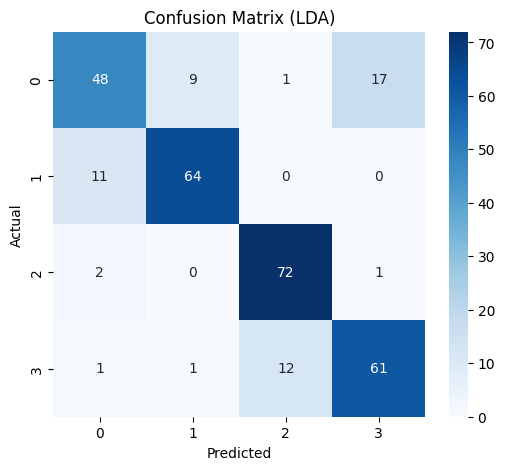

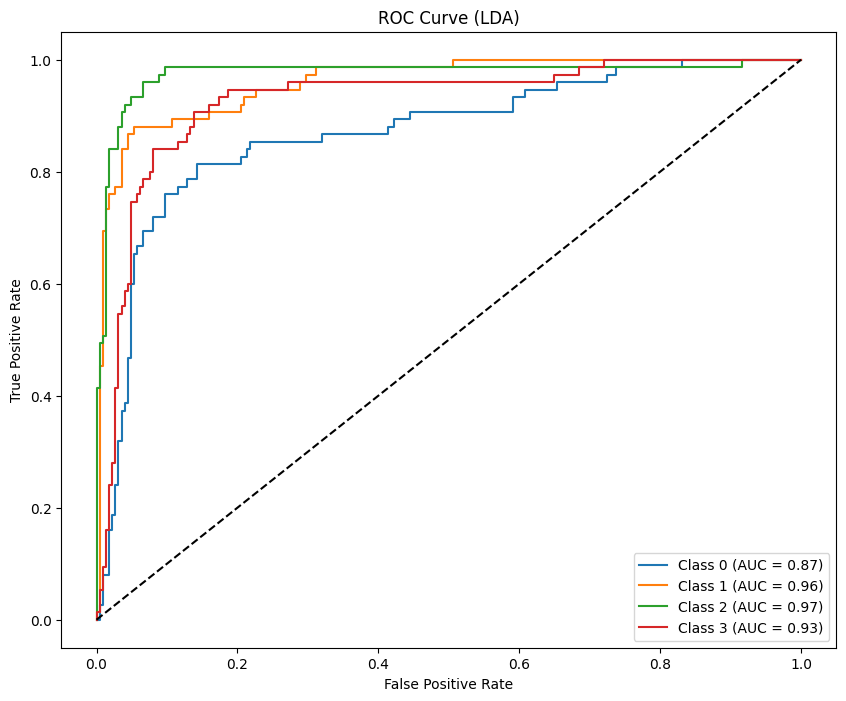

In [53]:
#linear discriminant analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize

# LDA Model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Predictions
y_pred = lda.predict(X_test)
y_pred_prob = lda.predict_proba(X_test)

# Classification report
print("Classification Report (LDA):")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (LDA)")
plt.show()

# ROC Curve
fpr, tpr, roc_auc = {}, {}, {}
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])

for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(4):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (LDA)")
plt.legend(loc="lower right")
plt.show()


Classification Report (Gaussian Naive Bayes):
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        75
           1       0.79      0.80      0.79        75
           2       0.82      0.87      0.84        75
           3       0.76      0.71      0.73        75

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300



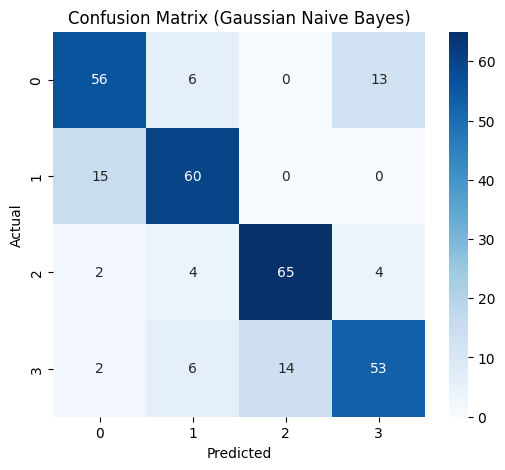

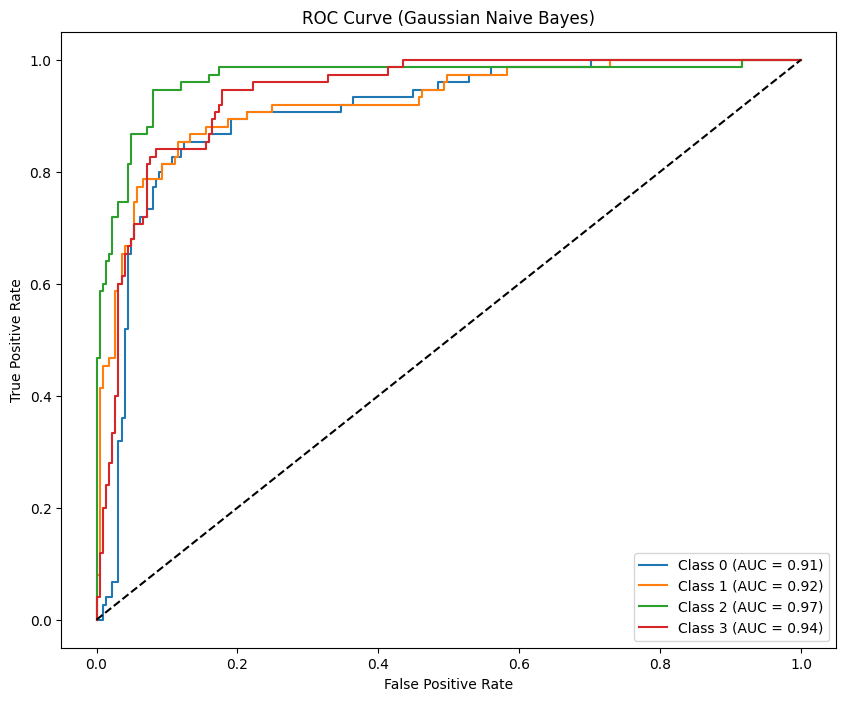

In [54]:
#gaussian naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize

# Gaussian Naive Bayes Model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predictions
y_pred = gnb.predict(X_test)
y_pred_prob = gnb.predict_proba(X_test)

# Classification report
print("Classification Report (Gaussian Naive Bayes):")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Gaussian Naive Bayes)")
plt.show()

# ROC Curve
fpr, tpr, roc_auc = {}, {}, {}
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])

for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(4):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Gaussian Naive Bayes)")
plt.legend(loc="lower right")
plt.show()
